In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [37]:
dataname = "V1_Mouse_Kidney"
thresh = 1000

# read in dataset paths
samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
row = samples.loc[dataname]

# outpath = "../output/readzs_ge/"

# load counts file
df = pd.read_csv(row["readzs_counts"],sep="\t",header=None)
df.rename(columns={0 : "cell_id",1  : "chr", 2 : "pos", 3 : "strand", 4 : "count", 5 : "sample", 6 : "window"},inplace=True)
print("1 df",df.shape)

# read in ReadZS zscore file
readzs = pd.read_csv(row["readzs_vals"],sep="\t")
print("readzs",readzs.shape)

# only include counts that a z score was calculated for
df = df[df["window"].isin(set(readzs["window"].unique()))]
print("2 df",df.shape)



# get the number of counts of each window per spot
df["id"] = df["window"] + "_" + df["cell_id"]
df["window_count"] = df["id"].map(df.groupby("id")["count"].sum())
df.drop("count",axis=1,inplace=True)

# now that we've summed values, we can drop duplicate cell/gene combos
df = df.drop_duplicates(["id"])

# merge with metadata
meta = pd.read_csv(row["metadata"],sep="\t")
df = df.merge(meta,on="cell_id")

# subset to windows with number nonzero spots > thresh
vc = df["window"].value_counts()
df = df[df["window"].isin(vc[vc > thresh].index)]
print("3 df",df.shape)

# find the count across all windows for each cell
df["cell_count"] = df["cell_id"].map(df.groupby("cell_id")["window_count"].sum())

# find the fraction of each window in each cell
df["frac_count"] = df["window_count"]/df["cell_count"]

1 df (23079278, 7)
readzs (7839535, 17)
2 df (23010443, 7)
3 df (1591848, 18)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


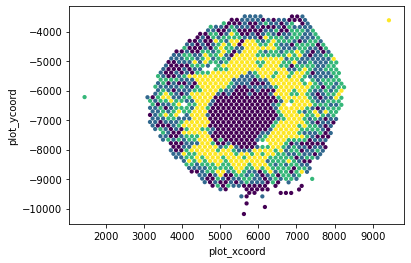

In [40]:
palette0 = "viridis"
# window = "chr11_6460_plus"
# window = "chr7_2607_minus"
window = "chr6_26770_minus"
gene_df = df[df["window"] == window]

col = "frac_count"
# col = "window_count"
gene_df["quant"] = 1


gene_df.loc[gene_df[col] > gene_df[col].quantile(.25),"quant"] = 2
gene_df.loc[gene_df[col] > gene_df[col].quantile(.5),"quant"] = 3
gene_df.loc[gene_df[col] > gene_df[col].quantile(.75),"quant"] = 4
sns.scatterplot(data = gene_df, x = "plot_xcoord", y = "plot_ycoord", hue = "quant",size=3,linewidth=0,palette=palette0,legend=False)
plt.show()

In [36]:
gene_df["window_count"]

3224       601742
8857       601742
17182      601742
22111      601742
28041      601742
            ...  
6880197    601742
6881996    601742
6883119    601742
6883414    601742
6883883    601742
Name: window_count, Length: 1434, dtype: int64

In [27]:
genedf["frac_count"].

1016       0.018460
5818       0.018219
12655      0.017951
20573      0.019338
24497      0.018084
             ...   
6879188    0.021578
6881172    0.022309
6882701    0.027679
6883381    0.072548
6883574    0.033238
Name: frac_count, Length: 1434, dtype: float64

In [2]:
df = pd.read_csv("/oak/stanford/groups/horence/JuliaO/visium_analysis/scripts/output/readzs_ge/V1_Mouse_Brain_Sagittal_Anterior_readzs_ge_1000.tsv",sep="\t")

In [4]:
df["id"] = df["cell_id"] + df["window"]

In [5]:
df["id"].value_counts()

V1_Mouse_Brain_Sagittal_Anterior_CATGGTAAGTAGCGTTchrX_1234_minus      1
V1_Mouse_Brain_Sagittal_Anterior_GCATAGAGCACTCAGGchr13_6826_minus     1
V1_Mouse_Brain_Sagittal_Anterior_GCATAGAGCACTCAGGchr13_1795_minus     1
V1_Mouse_Brain_Sagittal_Anterior_GCATAGAGCACTCAGGchr13_1855_minus     1
V1_Mouse_Brain_Sagittal_Anterior_GCATAGAGCACTCAGGchr13_2311_minus     1
                                                                     ..
V1_Mouse_Brain_Sagittal_Anterior_TGACCCACGTTAGACAchr11_23295_minus    1
V1_Mouse_Brain_Sagittal_Anterior_TGACCCACGTTAGACAchr11_23308_minus    1
V1_Mouse_Brain_Sagittal_Anterior_TGACCCACGTTAGACAchr11_23330_minus    1
V1_Mouse_Brain_Sagittal_Anterior_TGACCCACGTTAGACAchr11_23370_minus    1
V1_Mouse_Brain_Sagittal_Anterior_TCGCGTAGCAGTGTCCchr7_28015_minus     1
Name: id, Length: 10691979, dtype: int64

In [6]:
df["window"].nunique()

6567

In [7]:
df.shape

(10691979, 20)

In [9]:
d = df.groupby("window")["cell_id"].nunique()

In [11]:
d.sort_values()

window
chr5_29253_plus       681
chr2_5094_minus       800
chr19_802_plus        844
chr7_685_plus         861
chr1_26423_minus      888
                     ... 
chr10_25710_minus    2692
chr7_3940_minus      2692
chrX_33442_minus     2693
chr2_29775_minus     2694
chr19_1997_plus      2695
Name: cell_id, Length: 6567, dtype: int64

In [14]:
vc = df["window"].value_counts()

In [15]:
thresh = 1000

In [16]:
df.shape

(10691979, 20)

In [17]:
df = df[df["window"].isin(vc[vc > thresh].index)]

In [18]:
df.shape

(10168819, 20)